In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import math
sns.set_style("ticks")
sns.set_palette("Set3", 10)
sns.set_context("talk")

In [2]:
df = pd.read_csv('./results.csv')
with_results = df
print(df.columns)
df = df.drop(' result', axis=1)
print(len(df))

Index(['difficulty', ' workers', ' result', ' time'], dtype='object')
745


difficulty
1     30
2     27
3     23
4     31
5     22
6     21
7     19
8     26
9     23
10    29
11    19
12    32
13    18
14    30
15    23
16    18
17    26
18    14
19    21
20    26
21    19
22    26
23    29
24    40
25    24
26    19
27    24
28    40
29    18
30    28
dtype: int64


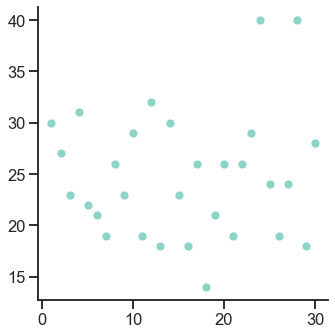

In [3]:
val = df.groupby(['difficulty']).size()
print(val)
sns.relplot(data=val)

     workers  difficulty        time
0          1   18.200000  471.938562
1          2   14.979167  161.965595
2          3   14.261905  234.047438
3          4   13.309524   78.624467
4          5   13.804878   65.385856
5          6   16.627907  207.676814
6          7   14.909091   66.466832
7          8   16.285714   72.314656
8          9   12.714286   34.561965
9         10   14.500000   44.124916
10        11   14.827586  106.389355
11        12   18.970588  228.249129
12        13   15.877551   43.144001
13        14   16.135135   57.462972
14        15   17.574468  130.782532
15        16   14.107143  111.353956
16        17   17.689655  108.752708
17        18   16.375000   76.302309
18        19   17.821429   56.970283
19        20   16.166667   84.269704
-0.47357375899645315


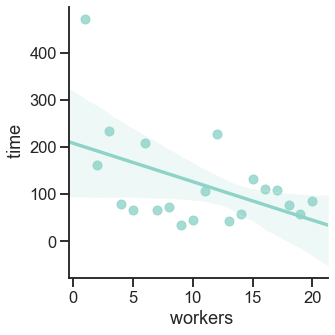

In [4]:
worker_group = (df.groupby([' workers']).mean()).reset_index()
print(worker_group)
print(worker_group[' workers'].corr(worker_group[' time']))
sns.lmplot(x=' workers', y=' time', data=worker_group)

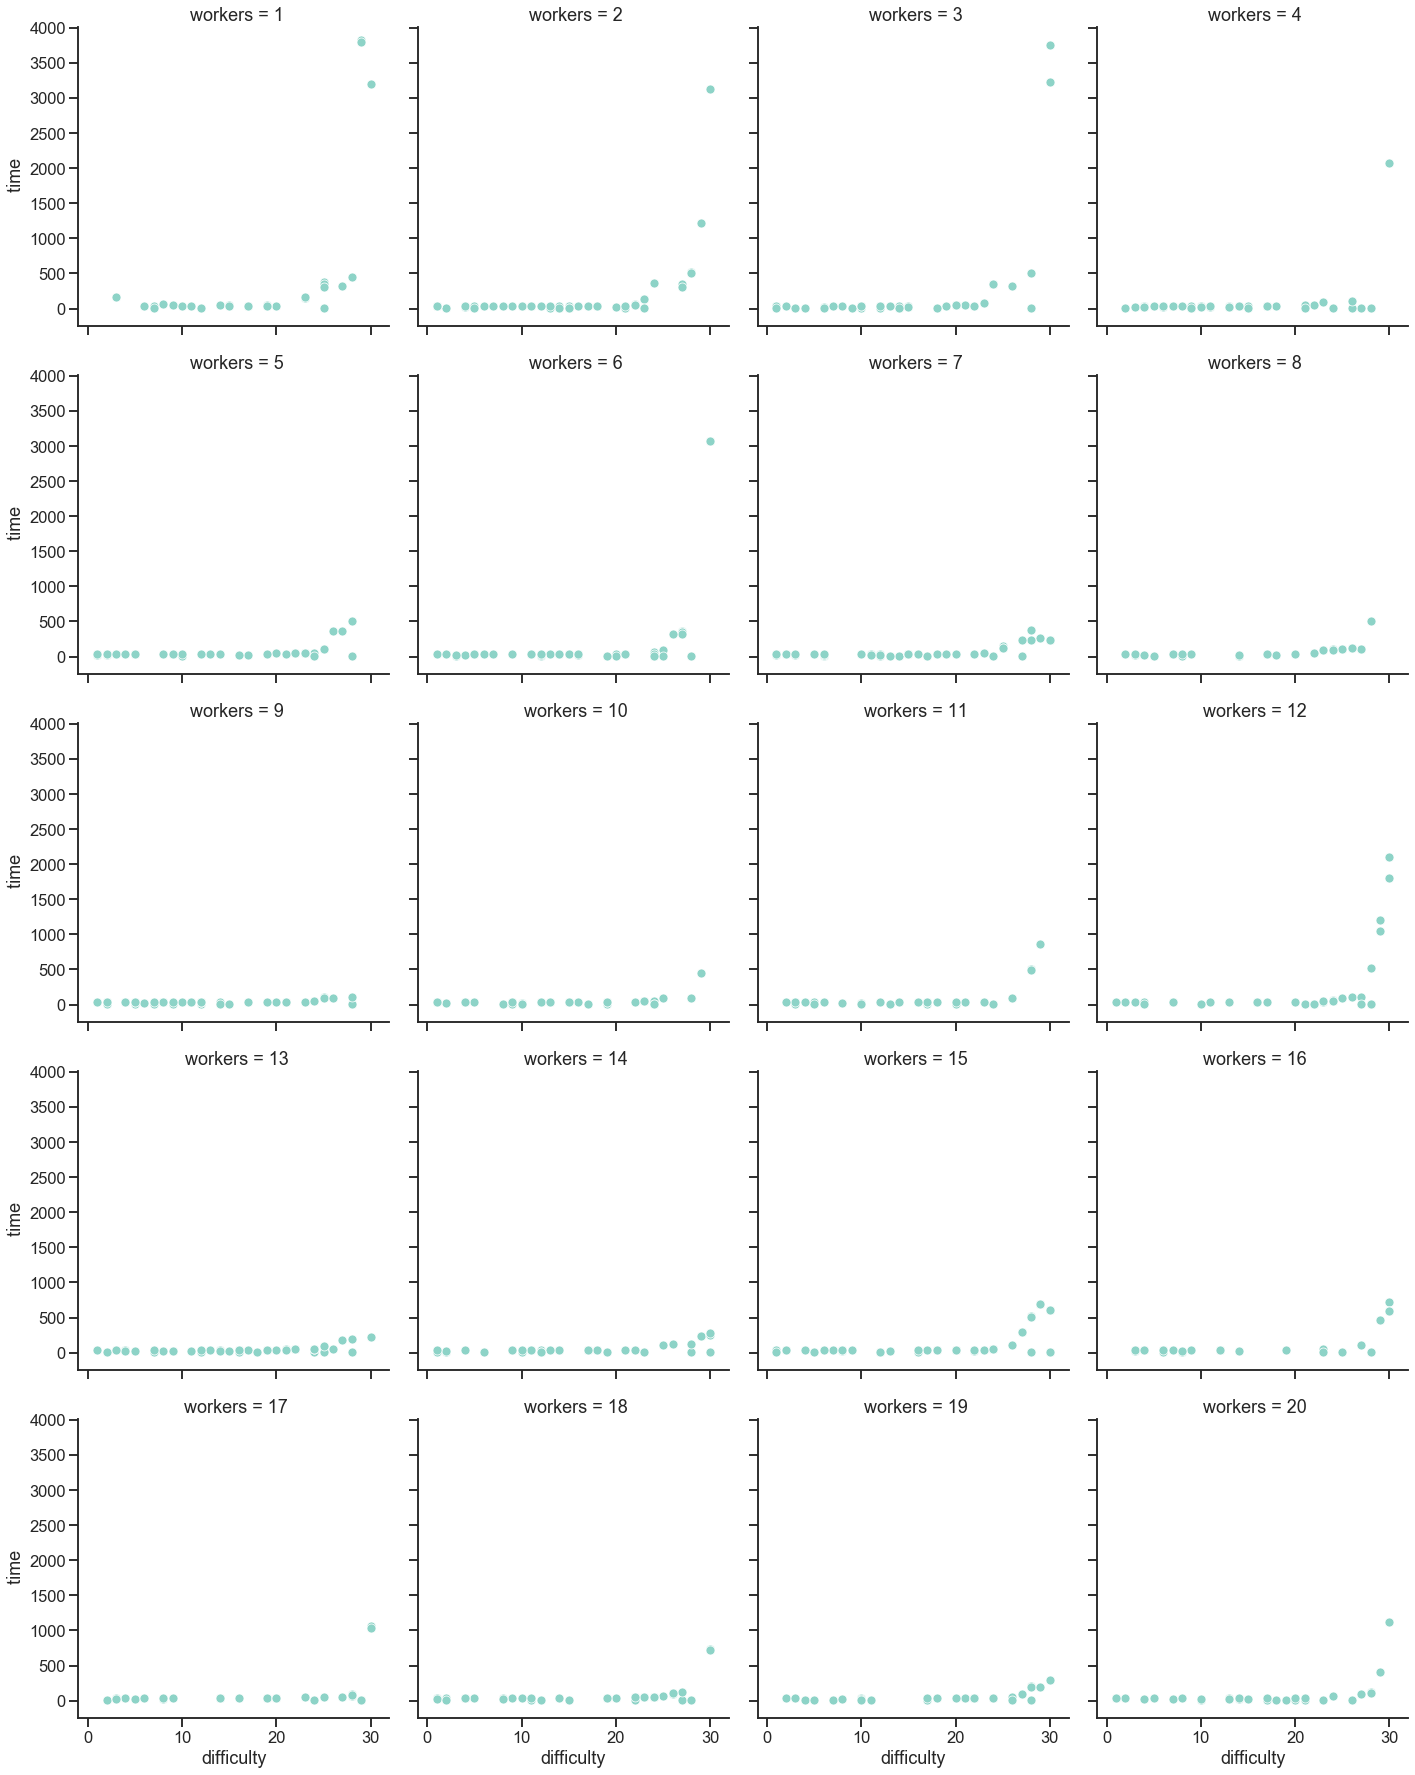

In [5]:
sns.relplot(x='difficulty', y=' time', col=' workers',col_wrap=4, data=df)

    difficulty    workers         time  log_time
0            1   9.533333    30.220635  3.408525
1            2  10.518519    25.842211  3.252009
2            3  10.086957    33.715502  3.517958
3            4  10.548387    29.672388  3.390217
4            5   9.590909    25.617217  3.243265
5            6   8.809524    27.201566  3.303275
6            7   9.210526    27.300364  3.306900
7            8  11.884615    29.388318  3.380597
8            9   9.130435    28.142757  3.337290
9           10   9.206897    25.017185  3.219563
10          11   9.052632    30.871514  3.429834
11          12   9.343750    23.914652  3.174491
12          13   9.000000    27.180465  3.302499
13          14   9.500000    27.002486  3.295929
14          15   6.565217    28.546121  3.351521
15          16  10.500000    30.092009  3.404260
16          17  10.384615    28.302682  3.342957
17          18  10.500000    29.272878  3.376661
18          19  11.000000    32.092753  3.468630
19          20  11.0

([], <a list of 0 Text yticklabel objects>)

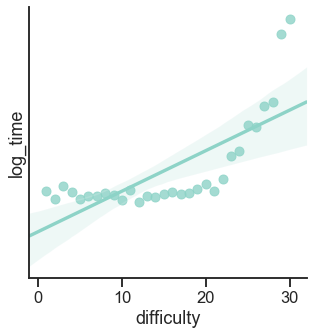

In [6]:
difficulty_group = (df.groupby(['difficulty']).mean()).reset_index()
difficulty_group['log_time'] = np.log(difficulty_group[' time'])
print(difficulty_group)
print(difficulty_group['difficulty'].corr(difficulty_group['log_time']))
sns.lmplot(x='difficulty', y='log_time', data=difficulty_group)
plt.yticks([])

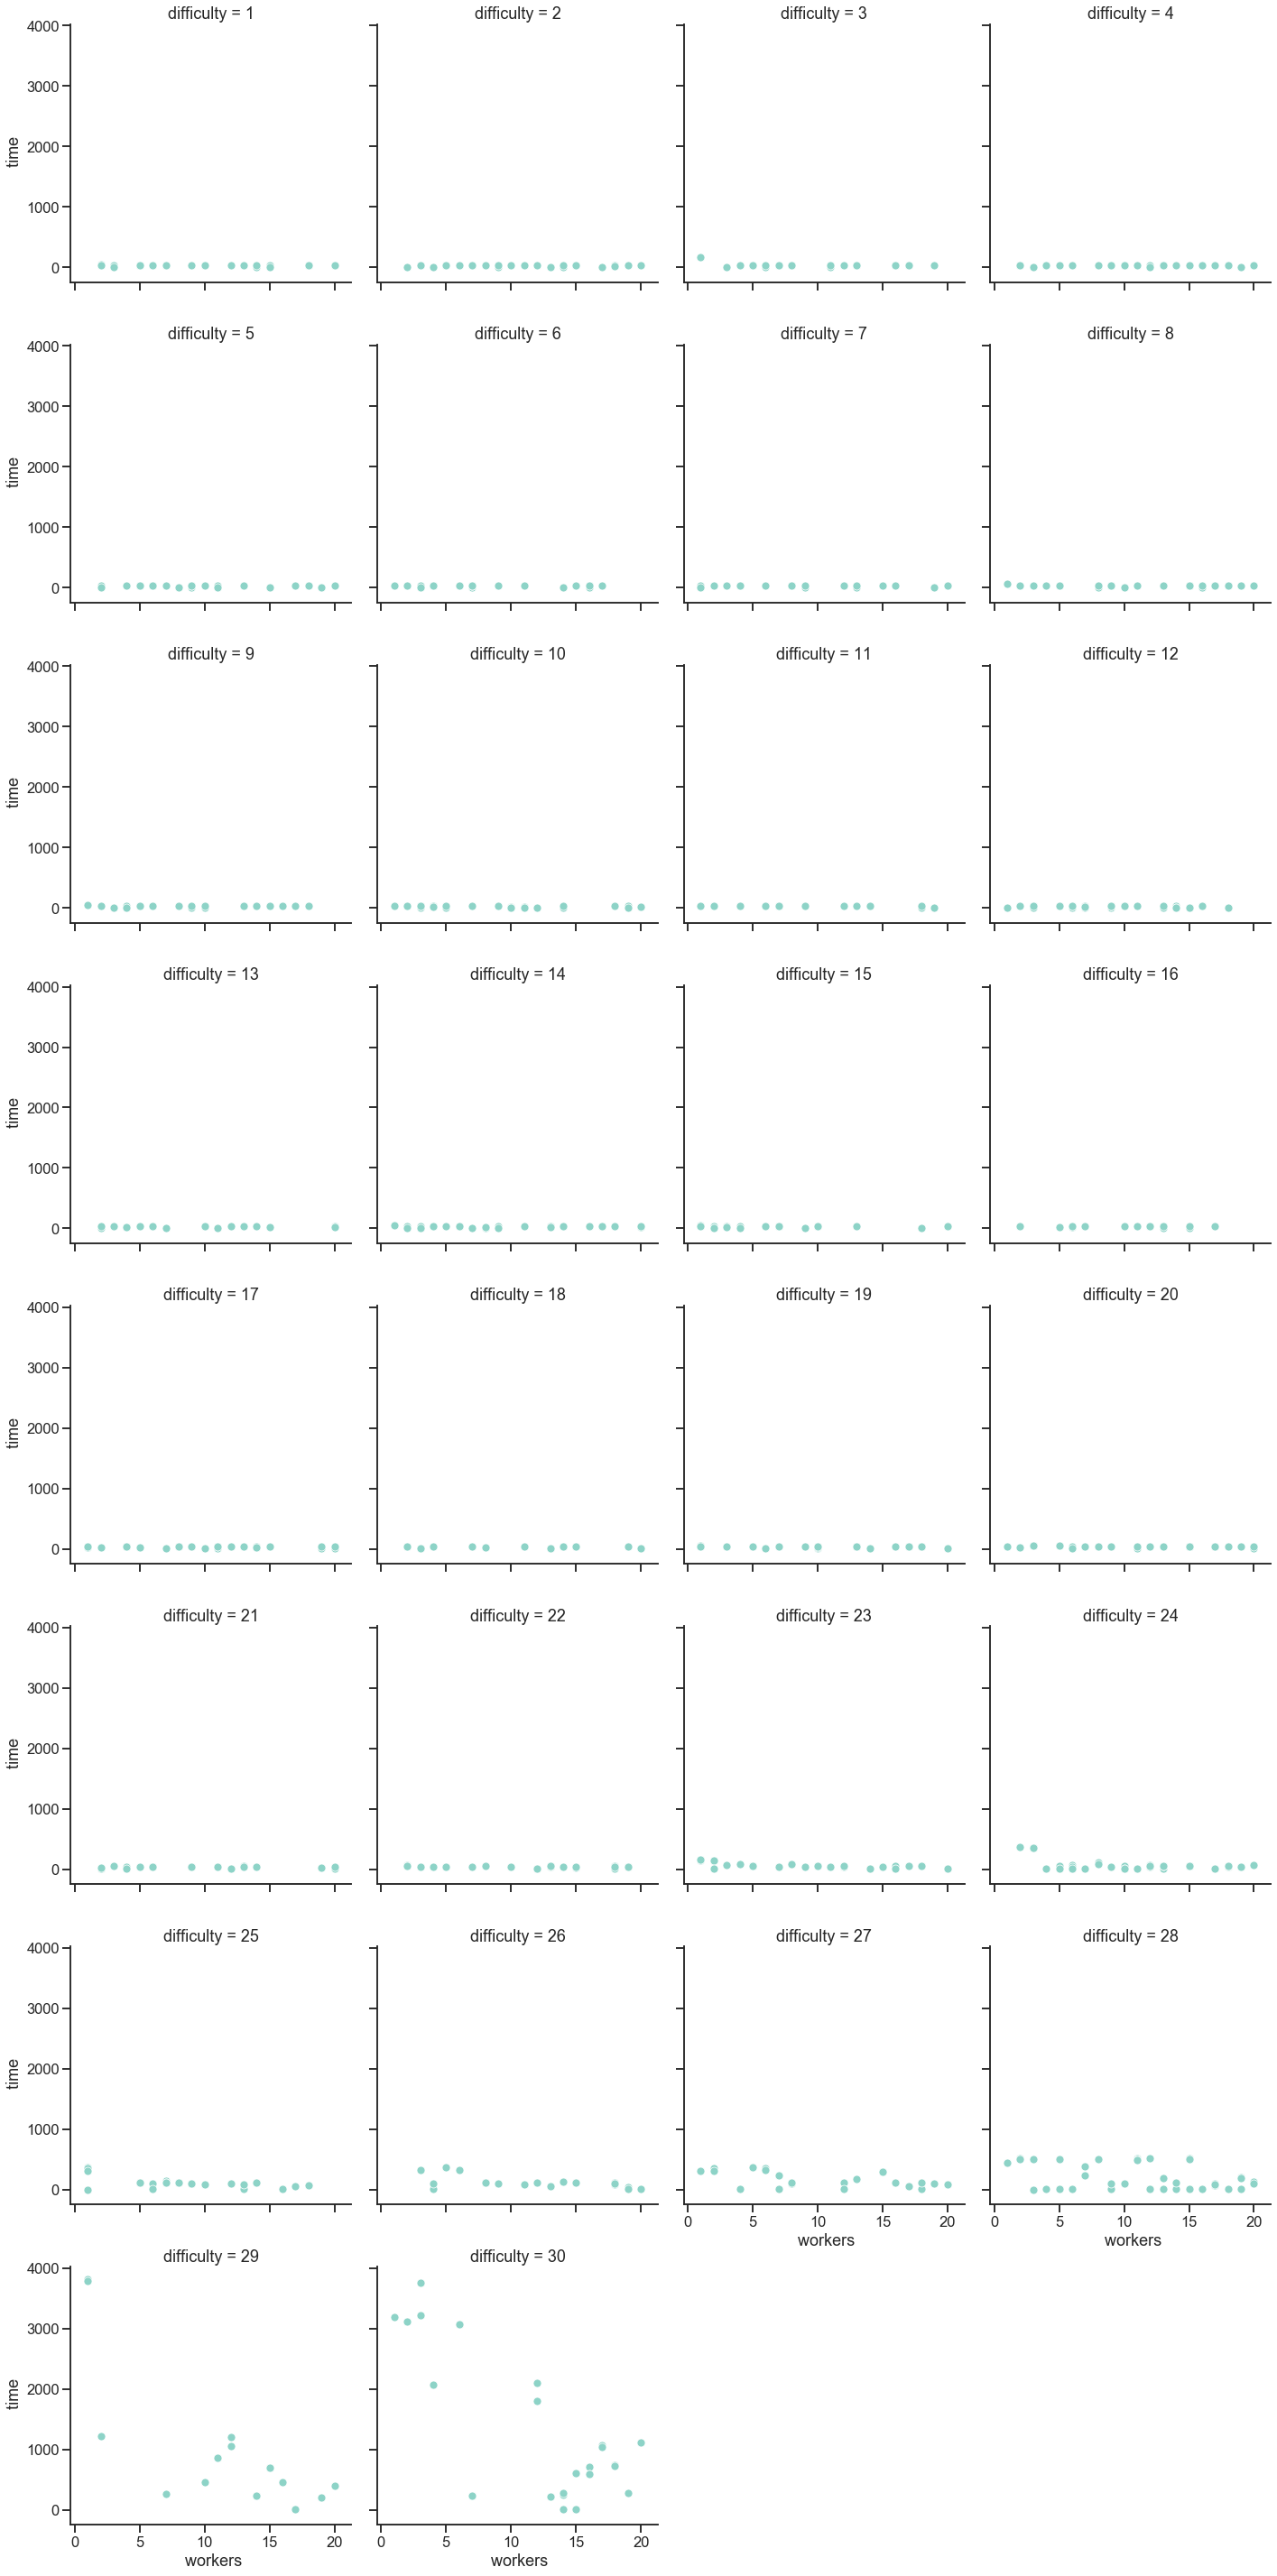

In [7]:
sns.relplot(x=' workers', y=' time', col='difficulty',col_wrap=4, data=df)

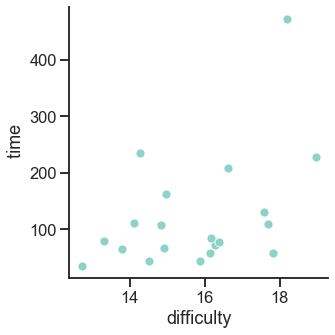

In [8]:
avg = df.groupby(' workers').mean()
sns.relplot(x='difficulty', y=' time', data=avg)

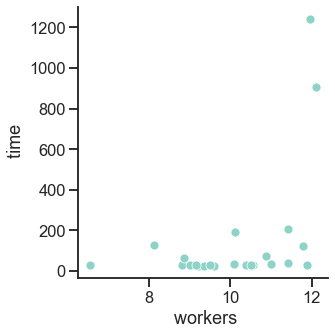

In [9]:
diff_avg = df.groupby('difficulty').mean()
sns.relplot(x=' workers', y=' time', data=diff_avg)

In [10]:
def remove_outliers(df):
    return df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

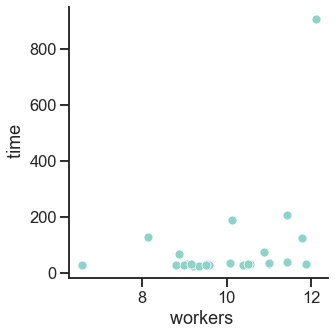

In [11]:
diff_avg = remove_outliers(df.groupby('difficulty').mean())
sns.relplot(x=' workers', y=' time', data=diff_avg)

<Figure size 1800x1800 with 0 Axes>

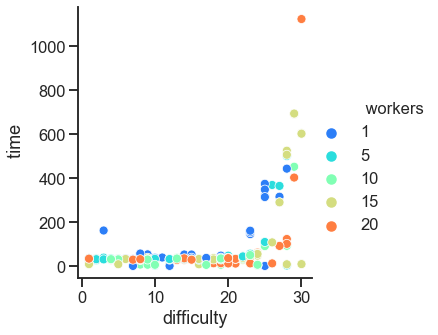

In [12]:
not_all_workers = remove_outliers(df.loc[(df[' workers'].isin([1,5,10,15,20]))])
plt.figure(figsize=(25, 25))
sns.relplot(x='difficulty', y=' time', hue=' workers', data=not_all_workers, palette=sns.color_palette('rainbow', n_colors=5))

<Figure size 1800x1800 with 0 Axes>

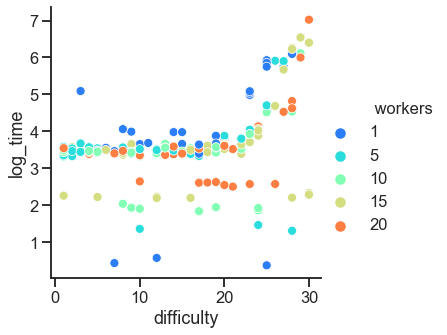

In [13]:
not_all_workers['log_time'] = np.log(not_all_workers[' time'])
plt.figure(figsize=(25, 25))
sns.relplot(x='difficulty', y='log_time', hue=' workers', data=not_all_workers, palette=sns.color_palette('rainbow', n_colors=5))

<Figure size 1800x1800 with 0 Axes>

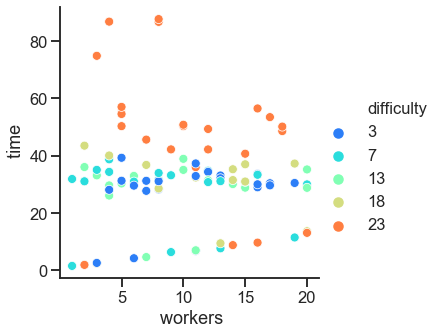

In [14]:
not_all_diff = remove_outliers(df.loc[(df['difficulty'].isin([3,7,13,18,23]))])
plt.figure(figsize=(25, 25))
sns.relplot(x=' workers', y=' time', hue='difficulty', data=not_all_diff, palette=sns.color_palette('rainbow', n_colors=5))

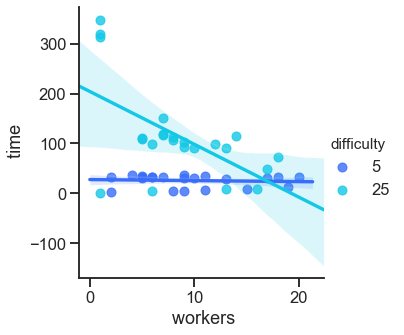

In [15]:
few_diff = remove_outliers(df.loc[(df['difficulty'].isin([5,25]))])
sns.lmplot(x=' workers', y=' time', hue='difficulty', data=few_diff, palette=sns.color_palette('rainbow', n_colors=6))

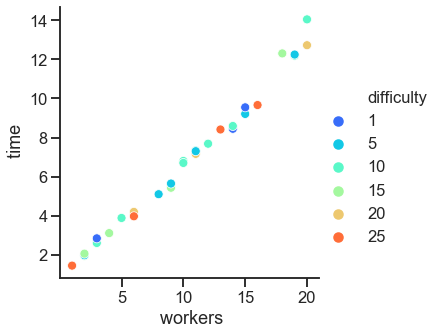

In [16]:
not_all_diff = remove_outliers(df.loc[(df[' time'] < 25)&(df['difficulty'].isin([1,5,10,15,20,25]))])
sns.relplot(x=' workers', y=' time', hue='difficulty', data=not_all_diff, palette=sns.color_palette('rainbow', n_colors=6))

In [17]:
less_time = with_results.loc[(with_results[' time'] < 25)&(df['difficulty'].isin([1,5,10,15,20,25, 30]))]
less_time

,difficulty,workers,result,time
29,25,1,2276240132,1.447290
53,20,11,2147573155,7.165817
66,10,20,663535756,14.048736
82,10,10,3579807234,6.803033
154,10,5,3284667259,3.885509
204,1,14,2864161208,8.449665
206,10,11,2692999092,7.338016
229,10,3,289498522,2.605338
245,10,14,1840700270,8.592172
260,15,18,1195519853,12.306693


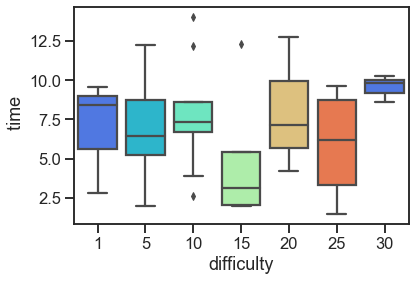

In [18]:
sns.boxplot(x='difficulty', y=' time', data=less_time, palette=sns.color_palette('rainbow', n_colors=6))

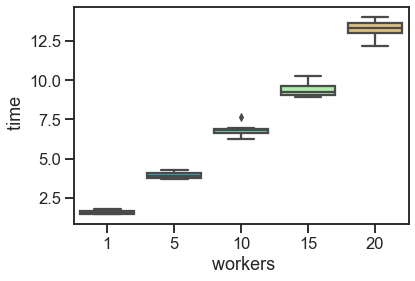

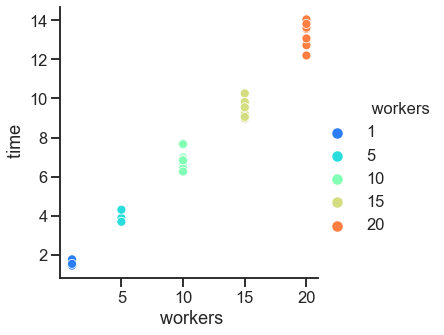

In [19]:
less_workers = with_results.loc[(with_results[' time'] < 25)&(df[' workers'].isin([1,5,10,15,20,25]))]
#less_workers = remove_outliers(with_results.loc[(df[' workers'].isin([1,5,10,15,20,25])) & (df[' time'] < 1000)])
sns.boxplot(x=' workers', y=' time', data=less_workers, palette=sns.color_palette('rainbow', n_colors=6))
sns.relplot(x=' workers', y=' time', hue=' workers', data=less_workers, palette=sns.color_palette('rainbow', n_colors=5))

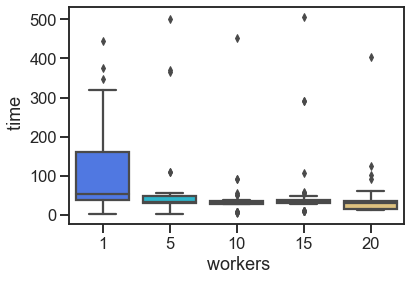

In [20]:
less_workers_under = remove_outliers(with_results.loc[(df[' workers'].isin([1,5,10,15,20,25])) & (df[' time'] < 1000)])
sns.boxplot(x=' workers', y=' time', data=less_workers_under, palette=sns.color_palette('rainbow', n_colors=6))

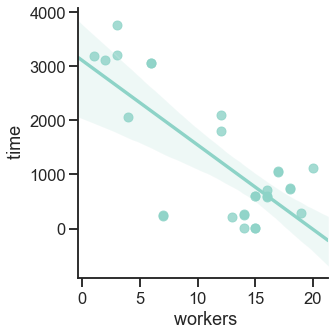

In [21]:
diff_max = df.loc[df['difficulty'] == 30]
sns.lmplot(x=' workers', y=' time', data=diff_max)

In [22]:
np.mean(diff_max.loc[(13 < diff_max[' workers'])& (diff_max[' workers'] < 20)])

difficulty     30.000000
 workers       15.933333
 time         501.310279
dtype: float64

In [35]:
time_count = df.round().groupby(' time').size().reset_index()
time_count.round()

,time,0
0,1.0,1
1,2.0,18
2,3.0,14
3,4.0,10
4,5.0,12
...,...,...
156,3197.0,1
157,3221.0,1
158,3761.0,1
159,3793.0,1


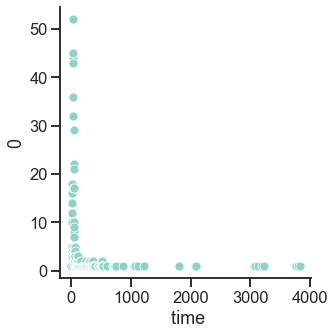

In [38]:
sns.relplot(x=' time', y=0, data=time_count)